# **CARGA DE TRAIN Y TEST**

In [15]:
import numpy as np
import pandas as pd

In [16]:
x_train=pd.read_excel('03-x_train-IEMOCAP-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('03-x_test-IEMOCAP-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('03-y_train-IEMOCAP-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('03-y_test-IEMOCAP-SINRUIDOGENERAL-dato_audioopensmile.xlsx',index_col=0)

In [17]:
x_train

,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
1516,0.743885,-7.681431,14.332486,0.068588,-0.013612,0.347178,27.148672,-16.294075,25.902292,-11.695338,...,16.146231,620.273804,1150.197021,-15.920386,1653.400879,864.460205,-26.185839,2670.144531,862.399109,-28.731779
602,0.469702,-14.651562,25.260201,0.057646,-0.019050,0.175443,34.415314,3.852205,16.822172,-12.384967,...,24.900015,428.609589,1208.133911,-4.847352,1413.373291,822.861511,-18.584755,2493.642578,727.019348,-25.779034
518,0.510915,-10.379361,19.733519,0.062636,-0.004355,0.194546,22.452084,8.028116,21.344213,-10.124190,...,22.286463,563.540649,1088.768799,-13.026692,1568.328369,647.335266,-27.913881,2685.422363,551.873474,-30.614582
2209,0.311705,-10.605919,18.213058,0.013143,-0.017829,0.108043,25.030741,3.900684,25.822327,-4.683084,...,17.077133,411.688995,1191.590454,-63.285343,1468.547852,783.283203,-72.888199,2328.327637,938.913147,-76.692856
1721,1.727160,-1.838349,15.510283,0.081704,-0.000664,1.030986,29.664146,-31.801390,2.955723,-21.260626,...,11.728682,649.418945,1336.353516,-1.208203,1587.384277,1127.933105,-2.868829,2587.140625,1007.452454,-11.677387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,0.166659,-14.389540,22.384350,0.033938,-0.022638,0.044200,29.126640,4.503049,23.807287,-20.285538,...,20.277275,475.608337,1255.237793,-42.684090,1611.391357,1017.083862,-60.345627,2534.083740,1058.623413,-60.357574
1731,0.174867,-18.458189,27.371233,0.018193,-0.023205,0.044047,32.831585,1.383458,22.089558,-14.645757,...,22.971600,639.366028,1338.963379,-10.471072,1681.372437,906.144897,-25.053009,2710.900879,906.924744,-29.038208
763,1.300888,-6.994747,18.716999,0.054561,-0.013580,0.559504,29.890221,-9.320832,8.044360,-22.513504,...,17.172222,457.796387,1156.178955,-0.211824,1354.140625,848.131592,-2.435529,2530.845947,565.995056,-13.567032
835,0.153785,-18.830345,24.992212,0.025843,-0.015946,0.045889,29.650818,8.298293,32.074741,-5.432630,...,19.053688,388.937805,1095.186401,-0.894236,1526.216064,932.331909,-28.624914,2338.770020,812.961121,-25.498619


# **BALANCEO DE DATOS**

In [18]:
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [19]:
overs = RandomOverSampler()

In [20]:
overs.fit(x_train, y_train)
x_t_overs, y_t_overs = overs.fit_resample(x_train, y_train)

In [21]:
y_t_overs

,Emociones
0,2
1,2
2,2
3,3
4,0
...,...
3439,3
3440,3
3441,3
3442,3


# **NORMALIZACION DE CARACTERISTICAS**

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_t_overs)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [23]:
x_train_std

array([[-2.18e-02,  5.09e-01, -1.24e+00, ...,  5.16e-01,  5.78e-02,
         2.92e-01],
       [-4.00e-01, -8.92e-01,  1.05e+00, ..., -6.64e-01, -8.72e-01,
         3.92e-01],
       [-3.43e-01, -3.33e-02, -1.08e-01, ...,  6.18e-01, -2.07e+00,
         2.28e-01],
       ...,
       [-7.58e-01, -7.98e-01,  4.93e-01, ..., -4.06e-01, -1.31e+00,
        -9.87e-01],
       [-7.94e-01, -1.31e+00,  5.51e-01, ..., -1.09e+00, -5.46e-01,
         3.41e-01],
       [-6.55e-01, -7.89e-01,  6.93e-01, ..., -7.04e-01,  8.63e-04,
         5.53e-01]])

# **MODELO DE MARCHINE LEARNING**

In [24]:
from sklearn import svm
clf = svm.SVC(kernel='poly')# poly  rbf sigmoid linear  precomputed
clf.fit(x_train_std, y_t_overs) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='poly')

In [25]:
y_predict = clf.predict(x_test_std)
y_predict

array([0, 1, 2, 2, 2, 2, 3, 2, 1, 1, 3, 3, 3, 3, 0, 3, 3, 1, 3, 1, 3, 2,
       0, 3, 3, 1, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 0, 3, 1,
       3, 3, 2, 2, 3, 1, 0, 2, 1, 2, 1, 2, 3, 2, 0, 2, 2, 1, 2, 2, 1, 3,
       1, 3, 1, 3, 2, 3, 3, 3, 2, 1, 1, 2, 3, 2, 3, 2, 3, 2, 0, 1, 2, 2,
       3, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 2, 3,
       2, 3, 3, 2, 1, 2, 3, 3, 2, 2, 2, 1, 3, 2, 3, 2, 3, 2, 1, 3, 2, 2,
       2, 3, 2, 2, 3, 2, 0, 2, 3, 2, 2, 2, 3, 3, 0, 2, 2, 2, 2, 3, 2, 2,
       0, 3, 3, 1, 1, 3, 2, 1, 0, 1, 3, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 1,
       2, 2, 1, 2, 3, 2, 0, 0, 3, 2, 2, 0, 2, 3, 3, 2, 2, 3, 2, 2, 0, 2,
       1, 2, 1, 0, 1, 2, 1, 2, 3, 2, 2, 2, 2, 3, 1, 2, 2, 3, 3, 3, 2, 2,
       1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 2, 3, 2, 2, 2, 0, 2, 2, 2,
       3, 2, 0, 3, 2, 3, 0, 2, 3, 2, 0, 2, 1, 3, 3, 3, 2, 2, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 2, 2, 2, 0, 2, 3, 3, 2, 3, 2,

# **EVALUACION**

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.70      0.62      0.66        53
           1       0.30      0.39      0.34        56
           2       0.69      0.65      0.67       238
           3       0.66      0.66      0.66       109

    accuracy                           0.62       456
   macro avg       0.59      0.58      0.58       456
weighted avg       0.63      0.62      0.62       456



In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.70      0.62      0.66        53
           1       0.30      0.39      0.34        56
           2       0.69      0.65      0.67       238
           3       0.66      0.66      0.66       109

    accuracy                           0.62       456
   macro avg       0.59      0.58      0.58       456
weighted avg       0.63      0.62      0.62       456

Matriz de confusión, sin normalización
[[ 33   8  12   0]
 [  6  22  25   3]
 [  8  41 155  34]
 [  0   3  34  72]]


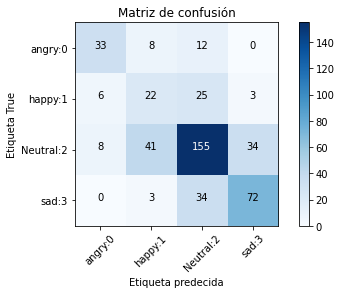

In [28]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')